# Метод Бубнова-Галёркина

8.6.3 (вариант 1)

y" - 5y' + 6y = 3

y(-1) = 1

y(1) = 1

-1 <= x <= 1


In [172]:
import numpy as np
import scipy.linalg as sla
from math import sqrt, cos, log, e
import matplotlib.pyplot as plt

In [173]:
def phi(l, h, x, x_v):
	if x < x_v[l - 1] or x > x_v[l + 1]:
		return 0
	if x_v[l - 1] <= x and x <= x_v[l]:
		return (x - x_v[l - 1]) / h
	if x_v[l] <= x and x <= x_v[l + 1]:
		return (x_v[l + 1] - x) / h

In [174]:
def dphidx(l, h, x, x_v):
	if x < x_v[l - 1] or x > x_v[l + 1]:
		return 0
	if x_v[l - 1] <= x and x <= x_v[l]:
		return (1 / h)
	if x_v[l] <= x and x <= x_v[l + 1]:
		return (-1 / h)

In [175]:
def	integral(left, right, h,  f):
	n = 2
	xi = left + h / 2
	result = 0	
	for i in range(0, n):
		result = result + f(xi)
		xi = xi + h
	return result / h


In [176]:
def A_i_j(i, j, left, right, h, x_v):
    f = lambda x: -1 * dphidx(i, h, x, x_v) * dphidx(j, h, x, x_v) -5 * dphidx(i, h, x, x_v) * phi(j, h, x, x_v) + 6 * phi(i, h, x, x_v) * phi(j, h, x, x_v)
    return integral(x_v[i - 1], x_v[i + 1], h, f)

In [177]:
def b_i(i, left, right, h, x_v):
    f = lambda x: -3 * phi(i, h, x, x_v)
    return integral(x_v[i - 1], x_v[i + 1], h, f)

In [178]:
def analitic(x):
    return (e**(2 * x) + e**(2 * x + 2) + e**(2 * x + 4) - e**(3 * x + 1) - e**(3 * x + 3) + e**2) / (2 * e**2)

20


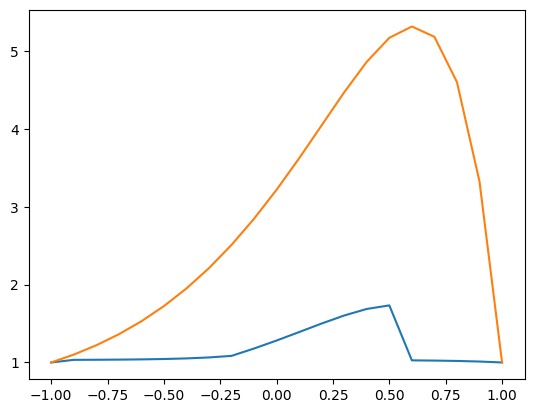

In [183]:
left = -1
right = 1
h = 0.1
x_v = [left]
n = int((right - left) / h)
for i in range(0, n):
    x_v.append(x_v[i] + h)
A = np.zeros((n - 1, n - 1))
b = np.zeros((n - 1))

print(n)

for i in range(1, n - 1):
    for j in range(i - 1, i + 2):
        A[i - 1, j - 1] = A_i_j(i, j, left, right, h, x_v)
A[n - 2, n - 2] = A_i_j(n - 1, n - 1, left, right, h, x_v)
A[n - 2, n - 3] = A_i_j(n - 1, n - 2, left, right, h, x_v)

for i in range(1, n):
    b[i - 1] = b_i(i, left, right, h, x_v)

# print(A)
# print(b)

C = np.linalg.solve(A.T, b)

y_v = []
y_analitic_v = []

for x in x_v:
    y = 1
    for i in range(0, len(C)):
        y = y + C[i]  * phi(i + 1, h, x, x_v)
    y_v.append(y)
    y_analitic_v.append(analitic(x))

plt.plot(x_v, y_v)
plt.plot(x_v, y_analitic_v)
plt.show()

10
20
40
80
160
320
640
1280


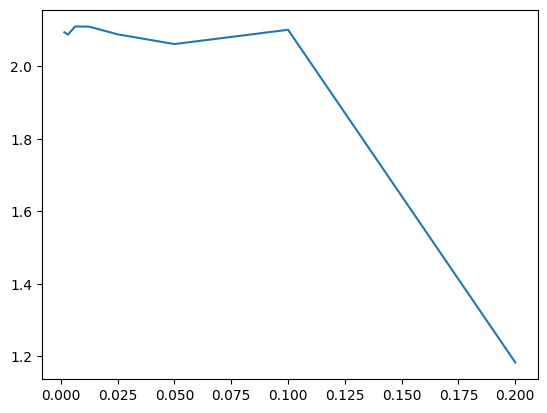

In [180]:
left = -1
right = 1

delta_v = []
h_v = []

h_list = [0.2]
n = 7 # h-count
for i in range(0, n):
    h_list.append(h_list[i] / 2)

for h in h_list:
    x_v = [left]
    n = int((right - left) / h)
    for i in range(0, n):
        x_v.append(x_v[i] + h)
    A = np.zeros((n - 1, n - 1))
    b = np.zeros((n - 1))

    print(n)

    for i in range(1, n - 1):
        for j in range(i - 1, i + 2):
            A[i - 1, j - 1] = A_i_j(i, j, left, right, h, x_v)
    A[n - 2, n - 2] = A_i_j(n - 1, n - 1, left, right, h, x_v)
    A[n - 2, n - 3] = A_i_j(n - 1, n - 2, left, right, h, x_v)

    for i in range(1, n):
        b[i - 1] = b_i(i, left, right, h, x_v)

    # print(A)
    # print(b)

    C = np.linalg.solve(A.T, b)

    delta = 0
    for x in x_v:
        y = 1
        for i in range(0, len(C)):
            y = y + C[i]  * phi(i + 1, h, x, x_v)
        
        y_analitic = analitic(x)

        if abs(y_analitic - y) > delta:
            delta = abs(y_analitic - y)
    
    delta_v.append(log(delta, 2))
    h_v.append(h)


plt.plot(h_v, delta_v)
plt.show()
